In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

7


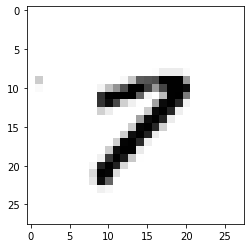

In [2]:
import matplotlib.pyplot as plt
image_index = 29
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
input_shape = (28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 33s 555us/step - loss: 0.2008 - accuracy: 0.9395
Epoch 2/10
60000/60000 [==============================] - 30s 503us/step - loss: 0.0814 - accuracy: 0.9755
Epoch 3/10
60000/60000 [==============================] - 27s 445us/step - loss: 0.0565 - accuracy: 0.9821
Epoch 4/10
60000/60000 [==============================] - 30s 496us/step - loss: 0.0429 - accuracy: 0.9863
Epoch 5/10
60000/60000 [==============================] - 27s 447us/step - loss: 0.0351 - accuracy: 0.9884
Epoch 6/10
60000/60000 [==============================] - 24s 403us/step - loss: 0.0283 - accuracy: 0.9908
Epoch 7/10
60000/60000 [==============================] - 24s 403us/step - loss: 0.0248 - accuracy: 0.9916
Epoch 8/10
60000/60000 [==============================] - 24s 399us/step - loss: 0.0202 - accuracy: 0.9934
Epoch 9/10
60000/60000 [==============================] - 24s 404us/step - loss: 0.0184 - accuracy: 0.9933
Epoch 10/10
60000/60000 [============

In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 95us/step


[0.06673227423560166, 0.9854000210762024]

In [12]:
model.save('handwriting_model.h5')